# Exploratory Data Analysis(Financial Inclusion Dataset)

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Determine the Relationship(s) between Bank account access to the metadata given(Age especially). Build a model to predict accessibility correctly.


### b) Defining the Metric for Success

>Based on the given data(factors) being able to predict ownership/access of a bank account by an individual

### c) Understanding the context 

> There's a very low degree of financial inclusion in the region which in turn is considered an indicator of the stunted level of economic and human development evident. Being able to predict bank access/use based on a persons profile will go a long way in helping bridge this gap as it can inform policies and initiatives

### d) Recording the Experimental Design

>Define Research Question:
How does the age of a person relate to bank account access/use?

>>Variables:  
Independent Variable: Age  
Dependent Variable: Bank Access


>Hypothesis:
>>Null Hypothesis:
Bank Access does not correlate with Age

>>Alternate Hypothesis:
Banks Access is more likely with decrease in Age




>Experimental treatments:
>>Independent Variable Variability: To the extent within the given dataset

>>Dependent Variable Treatment: As a Categorical Variable


### e) Data Relevance

## 2. Reading the Data

In [322]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
# Loading the Data from the source i.e. csv
# ---
fin = pd.read_csv('Financial Dataset - 1.csv')


## 3. Checking the Data

In [312]:
# Determining the no. of records in our dataset
#
fin.shape

(23524, 13)

In [198]:
# Previewing the top of our dataset
#
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [199]:
# Previewing the bottom of our dataset
# 
fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [200]:
# Checking whether each column has an appropriate datatype
#
fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Checked the additional information to get a clearer picture of the data. Key points is the year of the different records (depending with country). The general minimum age (16yrs) so if there's any discrepancy then that is something to question(Anomaly). One of the resources used was: [Link](https://fsduganda.or.ug/finscope-2018-survey-report/).

### a.Validation

## 5. Tidying the Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


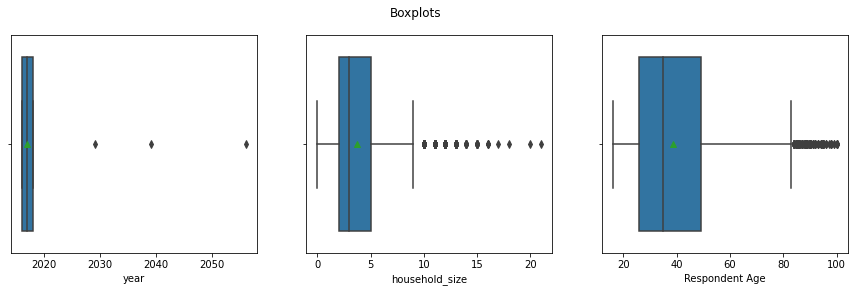

In [302]:
# Checking for Outliers & Anomalies
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15, 4))
fig.suptitle('Boxplots')
sns.boxplot(fin['year'], ax=ax1, showmeans = True)
sns.boxplot(fin['household_size'], ax=ax2, showmeans = True)
sns.boxplot(fin['Respondent Age'], ax=ax3, showmeans = True)

In [324]:
# Checking for Outliers & Anomalies
#from external source validation we know the years for each respective country so we can correct that
#instead of removing
from scipy import stats
import numpy as np

#for year
z = np.abs(stats.zscore(fin['year']))
print(z)
threshold = 3
print(np.where(z > 3))


#row indexes[213,308,7014]
#replacing
fin.loc[[213]]
#213 is a Kenyan record so it should be 2018
fin.replace({'year': {2029: 2018}}, inplace= True)

#replacing
fin.loc[[308]]
#308 is a Kenyan record so it should be 2018
fin.replace({'year': {2056: 2018}}, inplace= True)

#replacing
fin.loc[[7014]]
#308 is a Rwandan record so it should be 2016
fin.replace({'year': {2039: 2016}}, inplace= True)
fin.loc[[7014]]

[1.1348855 1.1348855 1.1348855 ... 1.1348855 1.1348855 1.1348855]
(array([ 213,  308, 7014]),)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
7014,Rwanda,2016,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [325]:
#checking for outliers in the other numeric columns
z = np.abs(stats.zscore(fin[['household_size','Respondent Age']]))
print(z)
threshold = 3
print(np.where(z > 3))


#no anomalies


[[nan nan]
 [nan nan]
 [nan nan]
 ...
 [nan nan]
 [nan nan]
 [nan nan]]
(array([], dtype=int64), array([], dtype=int64))


In [327]:
#CHecking and dealing with outliers in the Age column using InterQuartile Range
q1_age, q3_age = np.percentile(fin['Respondent Age'], [25, 75]) 

iqr = q3_age - q1_age

l_bound = q1_age - (1.5*iqr)
u_bound = q1_age + (1.5 * iqr)

fin[(fin['Respondent Age'] < l_bound) | (fin['Respondent Age'] > u_bound)]
fin.drop(fin[ (fin['Respondent Age'] > u_bound) | (fin['Respondent Age'] < l_bound) ].index , inplace=True)

In [318]:
# Identifying the Missing Data
#
fin.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [329]:
# Dealing with the Missing Data
#
fin.dropna(0,inplace= True)
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [330]:
# More data cleaning procedures
#standardizing the column names and dropping unnecessary fields
#column names
fin.columns = fin.columns.str.replace(' ', '_') 
fin.columns = fin.columns.str.strip() 
fin.columns = fin.columns.str.lower()
#dropping column
fin.drop('uniqueid', axis=1, inplace=True)
#rename column
fin.rename({'respondent_age': 'age','gender_of_respondent': 'gender','the_relathip_with_head': 'r_ship_with_head'}, axis=1, inplace=True)
fin.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,age,gender,r_ship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 6. Exploratory Analysis

###Univariate Analysis

In [267]:
# Ploting the Univariate summaries and recording our observations
#
#general statistics of the numerical data
fin.describe()

,year,household_size,age
count,20529.000000,20529.000000,20529.000000
mean,2016.978226,3.816991,34.361148
std,0.848330,2.300850,11.744840
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,25.000000
50%,2017.000000,3.000000,33.000000
75%,2018.000000,5.000000,43.000000
max,2018.000000,21.000000,60.000000


>The above statistics give a genetal idea of the data(mean, range, how many records).

In [213]:
print(f'country: {fin.country.nunique()}')
print(f'year: {fin.year.nunique()}')
print(f'has_a_bank_account: {fin.has_a_bank_account.nunique()}')
print(f'type_of_location: {fin.type_of_location.nunique()}')
print(f'cell_phone_access: {fin.cell_phone_access.nunique()}')
print(f'household_size: {fin.household_size.nunique()}')
print(f'age: {fin.age.nunique()}')
print(f'gender: {fin.gender.nunique()}')
print(f'r_ship_with_head: {fin.r_ship_with_head.nunique()}')
print(f'marital_status: {fin.marital_status.nunique()}')
print(f'level_education: {fin.marital_status.nunique()}')
print(f'type_of_job: {fin.type_of_job.nunique()}')


country: 4
year: 3
has_a_bank_account: 2
type_of_location: 2
cell_phone_access: 2
household_size: 21
age: 85
gender: 2
r_ship_with_head: 6
marital_status: 5
level_education: 5
type_of_job: 10


>Above is the unique count of each column, gives us information of possible categories when we get to implementing the solution

In [231]:
#Measures of central tendency and dispersion
#Using Age as this is the independent variable that we propose influences the dependent variable(Has a bank account)
print(f'Min: {fin.age.min()}')
print(f'Q1: {fin.age.quantile(.25)}')
print(f'Q2: {fin.age.quantile(.50)}')
print(f'Q3: {fin.age.quantile(.75)}')
print(f'Max: {fin.age.max()}')
print('*'*15)

print(f'Mean: {fin.age.mean()}')
print(f'Median: {fin.age.median()}')
print(f'Mode: {fin.age.mode().values[0]}')
print('*'*15)

print(f'Skew: {fin.age.skew()}')
print(f'Kurtosis: {fin.age.kurt()}')


Min: 16.0
Q1: 26.0
Q2: 35.0
Q3: 49.0
Max: 100.0
***************
Mean: 38.80550914621085
Median: 35.0
Mode: 30.0
***************
Skew: 0.840661747532081
Kurtosis: 0.09844652254807196


>From the above summary data we can observe that the age data is positively skewed meaning that the mean is greater than the mode
and it's Leptokurtic meaning that the tail of the distribution is heavy (outlier present).

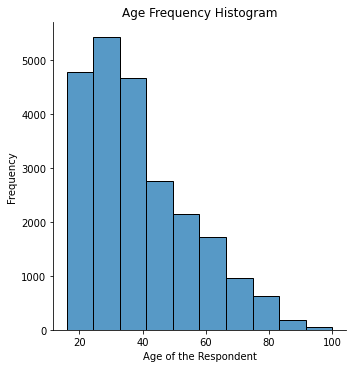

In [243]:
#Visual look at the age data
sns.displot(fin['age'], kind='hist',bins=10, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Age of the Respondent")
plt.title("Age Frequency Histogram")
plt.show()

>areas to note on the histogram is that it is not noramlly distributed. has a skew which can affect testing and model building

In [271]:
#Measures of central tendency and dispersion
#Using Household size because it could also be an indicator of the dependent variable(Has a bank account)
print(f'Min: {fin.household_size.min()}')
print(f'Q1: {fin.household_size.quantile(.25)}')
print(f'Q2: {fin.household_size.quantile(.50)}')
print(f'Q3: {fin.household_size.quantile(.75)}')
print(f'Max: {fin.household_size.max()}')
print('*'*15)

print(f'Mean: {fin.household_size.mean()}')
print(f'Median: {fin.household_size.median()}')
print(f'Mode: {fin.household_size.mode().values[0]}')
print('*'*15)

print(f'Skew: {fin.household_size.skew()}')
print(f'Kurtosis: {fin.household_size.kurt()}')

Min: 0.0
Q1: 2.0
Q2: 3.0
Q3: 5.0
Max: 21.0
***************
Mean: 3.8169905986653028
Median: 3.0
Mode: 2.0
***************
Skew: 0.907232935909039
Kurtosis: 0.9883449703123355


>From the above summary data we can observe that the age data is positively skewed meaning that the mean is greater than the mode
and it's Leptokurtic meaning that the tail of the distribution is heavy (outlier present).

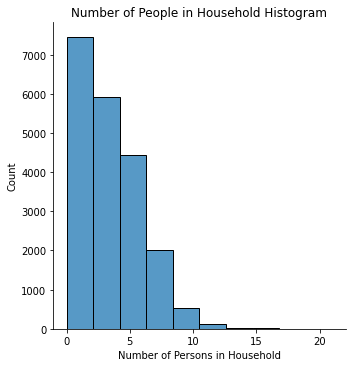

In [273]:
#Visual look at the age data
sns.displot(fin['household_size'], kind='hist',bins=10, kde=False)
plt.ylabel("Count")
plt.xlabel("Number of Persons in Household")
plt.title("Number of People in Household Histogram")
plt.show()

###Bivariate Analysis

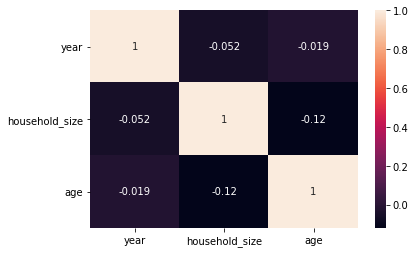

In [248]:
# Ploting the bivariate summaries and recording our observations
#Numerical to Numerical:Correlation
#checking correlations
sns.heatmap(fin.corr(),annot=True)
plt.show()

>As can be seen in the above heatmap, there is minimal correlation between the variables.

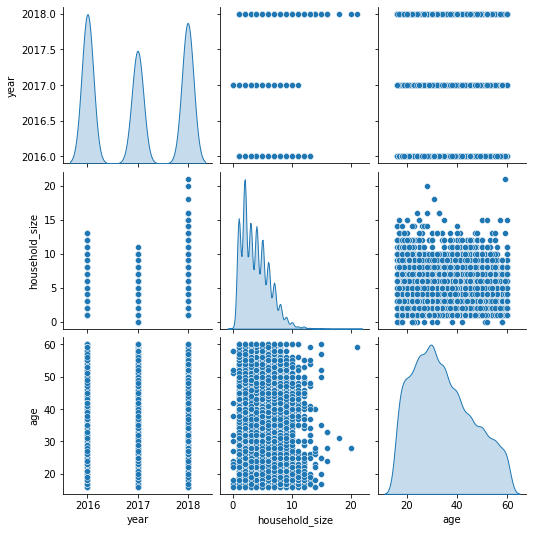

In [268]:
#Pair plot(summary of relationships)
sns.pairplot(fin, diag_kind='kde')

>The above summary shows again, no relation between the variables as points are spread out.

In [276]:
#Numerical to Categorical: t-test
#Age and Has a bank account
#subsetting dfs by account
has_ac = fin[(fin['has_a_bank_account'] == 'Yes')]
no_ac = fin[(fin['has_a_bank_account'] == 'No')]

# Before the t-test can be conducted, the assumptions of the t-test needs
# to be checked to see if the t-test results can be trusted in order to be used
#Assumptions in order for the test results to be valid.
# 1. The samples are independently and randomly drawn
# 2. The distribution of the residuals between the two groups should follow the normal distribution
# 3. The variances between the two groups are equal
# If any of these assumptions are violated then another test should be used. 
# The dependent variable (outcome being measured) should be continuous which is measured on an interval or ratio scale.
# --- 
stats.levene(has_ac['age'], no_ac['age'])

LeveneResult(statistic=92.84411572619186, pvalue=6.296415965318851e-22)

>In the above cell we see that the variable violates the t-test, therefore we try the Welch's t-test

In [270]:
#performing the Welch's t-test
print(stats.shapiro(has_ac['age']))
print(stats.shapiro(no_ac['age']))

(0.9662525653839111, 7.622231678634777e-26)
(0.9552112817764282, 0.0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


> Above we test the assumption of normality using the stats.shapiro(). The first value in the tuple is the W test statistic, and the second value is the p-value and again we see that it violates this assumption this may be explained by the presence of outliers in the data or other factors. For this case let's test another variable: Household size.


In [277]:
#Household size and Has a bank account
#subsetting dfs by account
has_ac = fin[(fin['has_a_bank_account'] == 'Yes')]
no_ac = fin[(fin['has_a_bank_account'] == 'No')]

stats.levene(has_ac['household_size'], no_ac['household_size'])


LeveneResult(statistic=6.007072571214112, pvalue=0.014256927603023902)

>In the above cell we see that the variable household size violates the t-test but it is way better than age, therefore we try the Welch's t-test

In [278]:
#performing the Welch's t-test
print(stats.shapiro(has_ac['household_size']))
print(stats.shapiro(no_ac['household_size']))

(0.9136533737182617, 3.327047732686919e-38)
(0.9179313778877258, 0.0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


>Again we see that it violates this assumption this may be explained by the presence of outliers in the data or other factors.


>Ideally we would have to deal with possible factors, find another method or re-think this approach. But for this case we shall move forward.

###Multivariate Analysis

>Principal Component Analysis (PCA) is used to carry out the analysis because we already have the categories (Yes and No for those who have a bank account) unlike Factor Analysis where we want to infer the caategories from possible groupings realized in the analysis.

In [400]:
# Mutlivariate summaries and recording our observations
#
#Principal Component analysis
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.

#setting the variables and label
X = fin.select_dtypes(np.number)
y = fin['has_a_bank_account']


In [385]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [386]:
# Normalization as PCA performs best with a normalized feature set. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [387]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [388]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 

explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is shown in the array which contains variance ratios for each principal component. 
# It can be seen that first principal component is responsible for 37.35% variance. 
#Second principal component causes 33.74% variance in the dataset. 
# Collectively we can say that (37.35 + 33.74) 71.09% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance

array([0.37359639, 0.33744811, 0.2889555 ])

In [389]:
#Using 1 Principal Component
# 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [390]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [391]:
#Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 4008 out of 4669 instances, 
# resulting in 85.84% accuracy.

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


> Since we only have 2 classes (for the label: Has a bank account) it is not possible to carry out a PCA with 2 or more components.

>Discriminant analysis is also a type statistical analysis that can be used to analyze the dataset because the dependent variable is categorical and the independent variable is continuous (Theoretically it may be better suited for this case).
 

In [393]:
# Mutlivariate summaries and recording our observations
#Linear Discriminant analysis
# The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.

#setting the variables and label

X = fin.select_dtypes(np.number)
y = fin['has_a_bank_account']


In [394]:
# Splitting the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [395]:
# Normalization as PCA performs best with a normalized feature set. 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [396]:
# Peforming LDA
#
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [397]:
#Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [398]:
# Evaluating the Performance
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved the same level of accuracy as the
# one achieved with one principal component.

[[4008    0]
 [ 661    0]]
Accuracy0.8584279288926965


> Since we only have 2 classes(for the label: Has a bank account) it is not possible to carry out a LDA with 2 or more components.

## 7. Implementing the Solution

>>From the above experimentation we achieved an acceptable level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal or 1 linear discriminant component is about 85%. From the results we can see that using one component we can loosely predict with an accuracy of 85% whether an individual has a bank account or not within East Africa.
Ideally we would take a number of principal components that contribute to significant variance and ignore those with diminishing variance returns. It is important to note that this dataset did not present an adequate number of factors/components to carry out PCA or LDA without violating some of the assumptions these tests are based on e.g normality. **The above conclusion is to be taken with extreme caution** as even if the accuracy is present, the component does not explain a significant portion of the variance(it failed the t-test with a p-value way less than 0.05 meaning that the variance was not homogeneous).
It is then adviced to either increase the number of factors observed (numerical values) which may directly influence the dependent variable and/or explain the variability in the current data or alternatively another method that uses the categorical data (utilising dummies) within the current dataset to calculate correlation should thus be used e.g. Multiple Linear Regression.

## 8. Challenging the solution

> We can also try and carry out hypothesis testing if we possible, the statistic of 13.9% access has been given it may be worth looking into if it is possible to provide an alternative hypothesis e.g. The statistic is > than that, then set out to try and accept or reject the null hypothesis.






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

>It is prudent to note that the data was not wrong but very limited.

### b). Do we need other data to answer our question?

>It is evident after trying to analyse the data is very limited in terms of possible factors and would be better if all the data was from the same year since in our case, different countries had different dated data which greatly influences the accuracy of any deductions made from it.

### c). Did we have the right question?

>I believe given the reality on the ground, that there is a relationship between age and access to a bank account due to the history of our development.